In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys 
import os
import numpy as np
import pandas as pd
import random


In [2]:
clean_df = pd.read_csv('mi_twitter_data_clean.csv', index_col = 1)

clean_df.info()
clean_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19652 entries, 1574810776933527553 to 1574454807079055360
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_Created     19652 non-null  object
 1   Full_Text        19652 non-null  object
 2   Entities         19652 non-null  object
 3   Count_Retweets   19652 non-null  int64 
 4   Count_Favorites  19652 non-null  int64 
 5   MI_Type          19652 non-null  int64 
 6   Clean_Text       19652 non-null  object
 7   Text_Length      19652 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.3+ MB


,Date_Created,Full_Text,Entities,Count_Retweets,Count_Favorites,MI_Type,Clean_Text,Text_Length
Tweet_ID,,,,,,,,
1574810776933527553,2022-09-27 17:18:42+00:00,"Psilocybin, the active ingredient found in mag...","{'hashtags': [], 'symbols': [], 'user_mentions...",677,5150,0,psilocybin the active ingredient found in magi...,163
1574881389358489610,2022-09-27 21:59:17+00:00,If you or anyone you love is experiencing deep...,"{'hashtags': [], 'symbols': [], 'user_mentions...",265,856,0,if you or anyone you love is experiencing deep...,135
1574870846841167887,2022-09-27 21:17:24+00:00,Post Lost Lands Depression,"{'hashtags': [], 'symbols': [], 'user_mentions...",165,444,0,post lost lands depression,26
1575169516249575429,2022-09-28 17:04:12+00:00,"o tambien cuando dice ""discomfort of depressio...","{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,0,o tambien cuando dice discomfort of depression...,267
1575169514739990528,2022-09-28 17:04:12+00:00,i forgot ab post concert depression,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0,0,i forgot ab post concert depression,35


In [3]:
clean_df['Clean_Text'] = clean_df['Clean_Text'].astype('|S')


In [4]:
dep_df = clean_df.loc[clean_df.MI_Type == 0].copy()
anx_df = clean_df.loc[clean_df.MI_Type == 1].copy()


In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
stopwords = set(stopwords.words('english'))
newStopWords = ["youre", "im", "thats", "bc", "ive"]
stopwords = stopwords.union(newStopWords)


In [7]:
dep_df['Clean_Text'] = dep_df['Clean_Text'].astype('|S').str.decode('utf-8')
anx_df['Clean_Text'] = anx_df['Clean_Text'].astype('|S').str.decode('utf-8')


In [8]:
dep_text = " ".join(tweet for tweet in dep_df['Clean_Text'])
anx_text = " ".join(tweet for tweet in anx_df['Clean_Text'])


In [10]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [11]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
random.seed(101)


In [14]:
def WordCloudViz(corpora):
    wordcloud = WordCloud(stopwords = stopwords, background_color = "black", 
                      max_words = 150).generate(corpora)
    fig = plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()


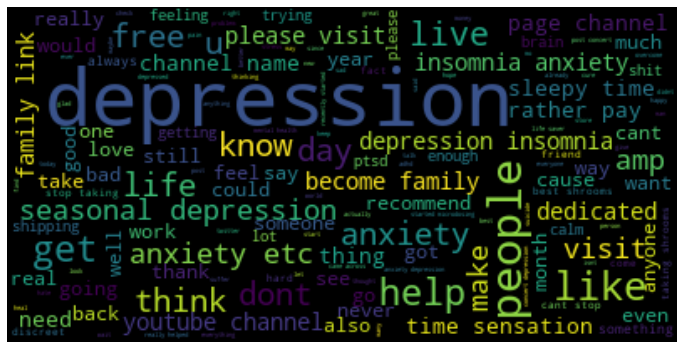

In [15]:
WordCloudViz(dep_text)


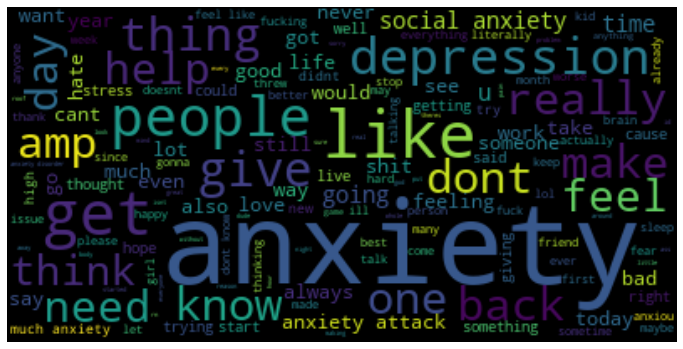

In [16]:
WordCloudViz(anx_text)


In [23]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns


In [18]:
def top_ngrams(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [20]:
def PlotTrigrams(trigrams):
    x,y = map(list,zip(*trigrams))
    sns.set_context("paper")
    plt.figure(figsize=(15,8))
    return sns.barplot(x = y, y = x)

<AxesSubplot:>

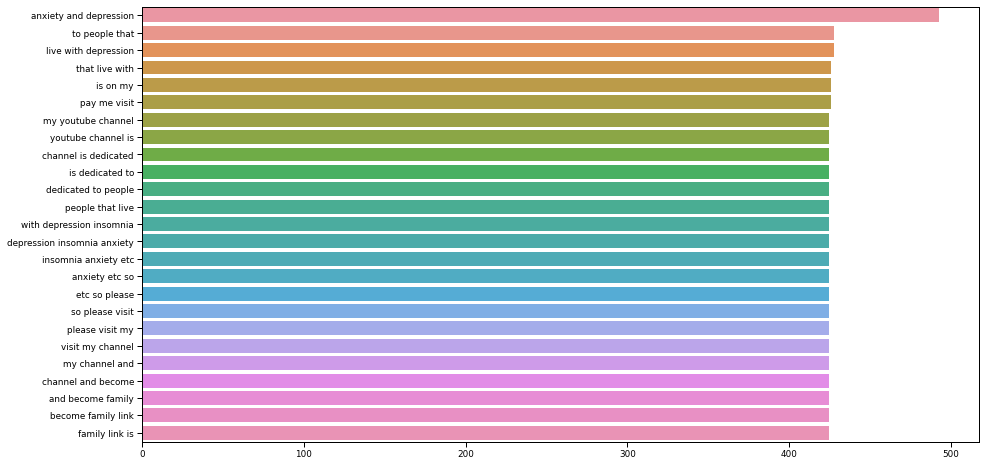

In [25]:
total_trigrams = top_ngrams(clean_df['Clean_Text'], 3)[:25]
PlotTrigrams(total_trigrams)

<AxesSubplot:>

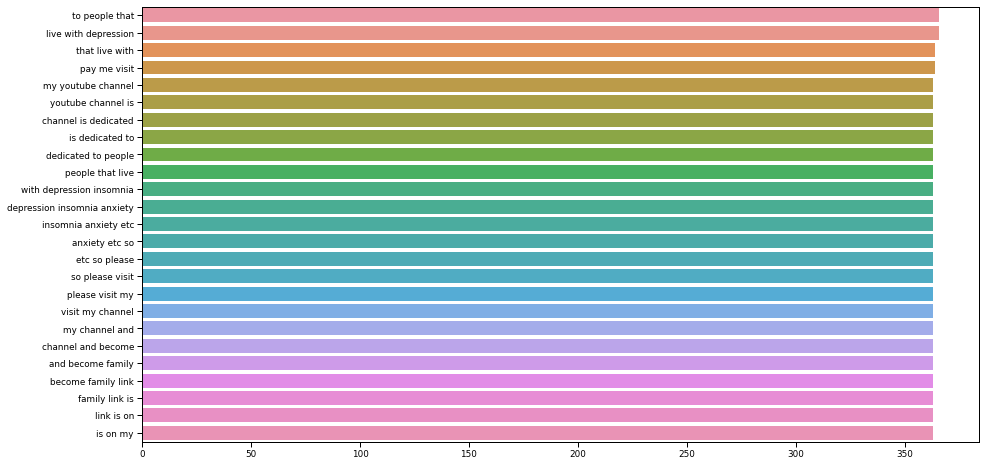

In [24]:
dep_trigrams = top_ngrams(dep_df['Clean_Text'], 3)[:25]
PlotTrigrams(dep_trigrams)
